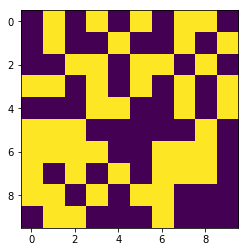

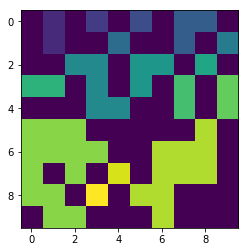

In [9]:
import numpy as np
from random import random
import matplotlib.pyplot as plt
import time
import concurrent.futures
import urllib.request
            
class SlowGrid:
    def __init__(self, fill_probability, grid_size = 10):
        self.grid_size = grid_size
        self.fill_grid_with_probability(fill_probability)
        self.clusterize()
        
    def fill_grid_with_probability(self, fill_probability):
        self.grid = np.zeros((self.grid_size, self.grid_size), dtype='int32')
        self.clusters = np.full((self.grid_size, self.grid_size), -1, dtype='int32')
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                self.grid[i][j] = 1 if random() < fill_probability else 0
                
    def clusterize(self):
        self.current_cluster = 0
        self.max_cluster = 0
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if self.grid[i][j] == 1 and self.clusters[i][j] == -1:
                    #print("Found cell at {},{}".format(i, j))
                    self.current_cluster += 1
                    self.current_cluster_size = 0

                    #print(clusters)
                    self.search_for_cluster(i, j)
                    if self.current_cluster_size > self.max_cluster:
                        self.max_cluster = self.current_cluster_size
                    
                    
    def search_for_cluster(self, i, j):
        self.clusters[i][j] = self.current_cluster
        self.current_cluster_size += 1

        #print("Recursive {},{}".format(i,j))
        #right
        if i + 1 < self.grid_size and self.clusters[i+1][j] == -1 and self.grid[i+1][j] == 1:
            #print("going right")
            self.search_for_cluster(i+1, j)

        #left
        if i - 1 >= 0 and self.clusters[i-1][j] == -1 and self.grid[i-1][j] == 1:
            #print("going left")
            self.search_for_cluster(i-1, j)

        #up
        if j - 1 >= 0 and self.clusters[i][j-1] == -1 and self.grid[i][j-1] == 1:
            #print("going up")
            self.search_for_cluster(i, j-1)

        #down
        if j + 1 < self.grid_size and self.clusters[i][j+1] == -1 and self.grid[i][j+1] == 1:
            #print("going down")
            self.search_for_cluster(i, j+1)

    def percolates(self):
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if self.clusters[0][i] == self.clusters[self.grid_size-1][j] and self.clusters[0][i] != -1 :
                    return True
        return False
    
    def max_cluster_size(self):
        return self.max_cluster
    
    def display_grid(self):
        img = plt.imshow(self.grid,interpolation='nearest')
        plt.show(img)

    def display_clusters(self):
        img = plt.imshow(self.clusters,interpolation='nearest')
        plt.show(img)        
        
g = SlowGrid(0.5)
g.display_grid()
g.display_clusters()  # each color represents a different cluster - dark purple is not a cluster

In [2]:
from UF import UnionFind

class FastGrid:
    def __init__(self, fill_probability, grid_size = 10):
        self.grid_size = grid_size
        self.union_find = UnionFind(self.grid_size*self.grid_size)
        self.fill_grid_with_probability(fill_probability)
        
    def fill_grid_with_probability(self, fill_probability):
        self.grid = np.zeros((self.grid_size, self.grid_size), dtype='int32')
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if random() < fill_probability:
                    self.grid[i][j] = 1
                    self.connect_with_neighbors(i, j)
                    
    def reconstruct(self, other_grid):
        self.grid = other_grid.grid
        self.grid_size = other_grid.grid_size
        self.union_find = UnionFind(self.grid_size*self.grid_size)
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                if self.grid[i][j] == 1:
                    self.connect_with_neighbors(i, j)
                
    def connect_with_neighbors(self, i, j):
        current_position = self.union_position_for_cell(i, j)
        #right
        if i + 1 < self.grid_size and self.grid[i+1][j] == 1:
            right = self.union_position_for_cell(i+1, j)
            self.union_find.union(current_position, right)
            #print("connecting {}({}{}) and {}({}{})".format(current_position,i,j, right,i+1,j))
        #left
        if i - 1 >= 0 and self.grid[i-1][j] == 1:
            left = self.union_position_for_cell(i-1, j)
            self.union_find.union(current_position, left)
            #print("connecting {}({}{}) and {}({}{})".format(current_position,i,j, left,i-1,j))
        #up
        if j - 1 >= 0 and self.grid[i][j-1] == 1:
            up = self.union_position_for_cell(i, j-1)
            self.union_find.union(current_position, up)
            #print("connecting {}({}{}) and {}({}{})".format(current_position,i,j, up,i,j-1))
        #down
        if j + 1 < self.grid_size and self.grid[i][j+1] == 1:
            down = self.union_position_for_cell(i, j+1)
            self.union_find.union(current_position, down)
            #print("connecting {}({}{}) and {}({}{})".format(current_position,i,j, down,i,j+1))

    def union_position_for_cell(self, i, j):
        return i * self.grid_size + j
    
    def percolates(self):
        for i in range(self.grid_size):
            for j in range(self.grid_size):
                upper_cell = self.union_position_for_cell(0, i)
                lower_cell = self.union_position_for_cell(self.grid_size-1, j)
                if self.union_find.connected(upper_cell, lower_cell):
                    return True
        return False

    def max_cluster_size(self):
        return self.union_find.max_component()
    
    def display_grid(self):
        img = plt.imshow(self.grid,interpolation='nearest')
        plt.show(img)

In [3]:
p_samples = [0.10, 0.20, 0.30, 0.35, 0.40, 0.42, 0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 
             0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65, 0.70, 0.80, 0.90]

# boring single threaded implementation
def simulate(steps, grid_size, fast=True):
    probs   = []
    percs   = []
    avgsz   = []
    timings = []
    
    for p in p_samples:
        percolations = 0
        max_size_avg = 0
        print("For p={} grid_size={}".format(p, grid_size))
        t0 = time.time()        
        for t in range(steps):
            t % 300 == 0 and print("Step {}".format(t))
            g = FastGrid(p, grid_size) if fast else SlowGrid(p, grid_size)
            max_size_avg += g.max_cluster_size()
            if g.percolates():
                percolations += 1

        t1 = time.time()
        total_time = t1-t0
        
        probs.append(p)
        percs.append(percolations / steps)
        avgsz.append(max_size_avg / steps)
        timings.append(total_time)
        print("percolations: {}, took:{}".format(percolations, total_time))
        
    return (probs, avgsz, percs, timings)

In [4]:
 def run(probability, grid_size, steps=1000, fast=True):
    percolations = 0
    max_size_avg = 0
    t0 = time.time()
    for t in range(steps):
        #t % 300 == 0 and print("Thread {} Step {}".format(i, t))
        g = FastGrid(probability, grid_size) if fast else SlowGrid(probability, grid_size)
        max_size_avg += g.max_cluster_size()
        if g.percolates():
            percolations += 1

    t1 = time.time()
    
    total_time = t1-t0 
    percs = percolations / steps
    avg_size = max_size_avg / steps
   
    print("Thread for prob:{} finished grid_size={} percolations: {}, took:{}".format(probability, grid_size, percolations, total_time))

    return probability, avg_size, percs, total_time

def run_batch(grid_size, steps=1000, fast=True, workers=16):
    print("Running batch with {} workers, generating grids of size:{}, steps:{}, fast:{}".format(workers, grid_size, steps, fast))
    t0 = time.time()
    pa, ma, psa, ta = [], [], [], []
    
    with concurrent.futures.ProcessPoolExecutor(max_workers=workers) as executor:
        future_to_result = {executor.submit(run, p, grid_size, steps, fast): p for p in p_samples}
        for future in concurrent.futures.as_completed(future_to_result):
            p = future_to_result[future]
            try:
                data = future.result()
            except Exception as exc:
                print("Generated an exception: {}".format(exc))
            else:
                pa.append(data[0])
                ma.append(data[1])
                psa.append(data[2])
                ta.append(data[3])
                
    t1 = time.time()
    print("Batch run for grid_size:{} took:{}".format(grid_size, t1-t0))
    return pa, ma, psa, ta

# this will take a few minutes... go grab some tea

print("Waiting for jobs to finish...")
p_50, m_50, ps_50, timings_50 = run_batch(50)
print("------------------------------------")
p_100, m_100, ps_100, timings_100 = run_batch(100)
print("------------------------------------")
p_150, m_150, ps_150, timings_150 = run_batch(150)
print("------------------------------------")
print("Finished all jobs")

Waiting for jobs to finish...
Running batch with 16 workers, generating grids of size:50, steps:1000, fast:True
Thread for prob:0.1 finished grid_size=50 percolations: 0, took:24.084757804870605
Thread for prob:0.2 finished grid_size=50 percolations: 0, took:33.71684503555298
Thread for prob:0.3 finished grid_size=50 percolations: 0, took:44.20590114593506
Thread for prob:0.35 finished grid_size=50 percolations: 0, took:50.16748094558716
Thread for prob:0.4 finished grid_size=50 percolations: 0, took:56.51581382751465
Thread for prob:0.42 finished grid_size=50 percolations: 0, took:59.4876971244812
Thread for prob:0.45 finished grid_size=50 percolations: 0, took:63.47955274581909
Thread for prob:0.46 finished grid_size=50 percolations: 0, took:64.84564518928528
Thread for prob:0.47 finished grid_size=50 percolations: 0, took:66.02292585372925
Thread for prob:0.48 finished grid_size=50 percolations: 1, took:67.44009184837341
Thread for prob:0.49 finished grid_size=50 percolations: 1, to

In [44]:
#we need to do a simple sort to oder the data by probability

def sort_results(pa, ma, psa):
    return zip(*sorted(zip(pa, ma, psa), key = lambda t: t[0]))

p_50, m_50, ps_50 = sort_results(p_50, m_50, ps_50)
p_100, m_100, ps_100 = sort_results(p_100, m_100, ps_100)
p_150, m_150, ps_150 = sort_results(p_150, m_150, ps_150)

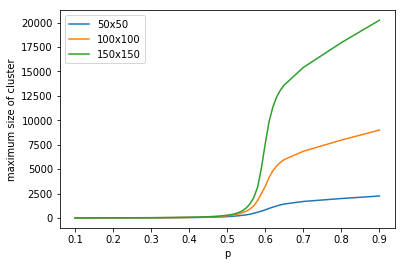

(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.001, 0.001, 0.001, 0.002, 0.015, 0.032, 0.055, 0.121, 0.204, 0.328, 0.466, 0.625, 0.736, 0.858, 0.915, 0.953, 0.982, 1.0, 1.0, 1.0)


In [38]:
plt.xlabel('p')
plt.ylabel('maximum size of cluster')
plt.plot(p_50,m_50, label = '50x50')
plt.plot(p_100,m_100, label ='100x100')
plt.plot(p_150,m_150, label= '150x150')
plt.legend(loc='best')
plt.show()
print(ps_50)

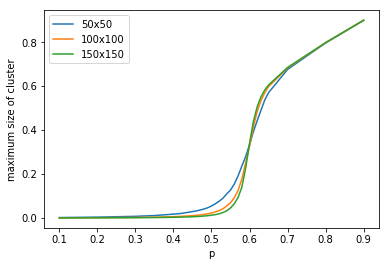

In [39]:
plt.xlabel('p')
plt.ylabel('maximum size of cluster')
plt.plot(p_50,[i/(50*50) for i in m_50], label = '50x50')
plt.plot(p_100,[i/(100*100) for i in m_100], label ='100x100')
plt.plot(p_150,[i/(150*150) for i in m_150], label= '150x150')
plt.legend(loc='best')
plt.show()

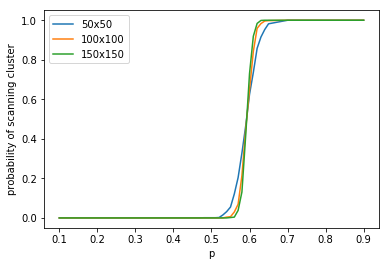

In [40]:
plt.xlabel('p')
plt.ylabel('probability of scanning cluster')
plt.plot(p_50,ps_50, label = '50x50')
plt.plot(p_100,ps_100, label ='100x100')
plt.plot(p_150,ps_150, label= '150x150')
plt.legend(loc='best')
plt.show()

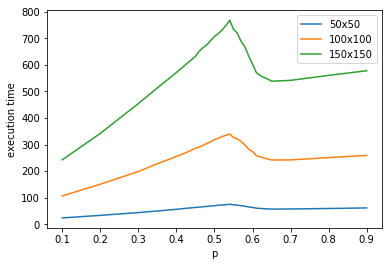

In [49]:
plt.xlabel('p')
plt.ylabel('execution time')
plt.plot(p_50,timings_50, label = '50x50')
plt.plot(p_100,timings_100, label ='100x100')
plt.plot(p_150,timings_150, label= '150x150')
plt.legend(loc='best')
plt.show()